In [2]:
import numpy as np 
import xarray as xr 
import matplotlib.pyplot as plt 

In [34]:
import h5py

with h5py.File("/global/homes/l/linyaoly/Jupiter_polar_vortex/codes/dedalus/snapshots/snapshots_s1.h5", "r") as f:
    print("Top-level keys:", list(f.keys()))        # likely includes 'scales' and 'tasks'
    print("Task variables:", list(f["tasks"].keys()))  # e.g., ['psi1', 'psi2']
    print("Task variables:", list(f["scales"].keys()))  # e.g., ['psi1', 'psi2']

    psi1 = f["tasks/psi1"][:]   # read full psi1 data
    print(psi1.shape)           # e.g., (time, x, y) or (time, r, phi)
    psi2 = f["tasks/psi2"][:]
    q1 = f["tasks/q1"][:]
    q2 = f["tasks/q2"][:]
    dset = f['tasks']['q1']
    phi = np.reshape(dset.dims[1][0][:].ravel(), (-1, 1))
    r = np.reshape(dset.dims[2][0][:].ravel(), (1,-1))


Top-level keys: ['scales', 'tasks']
Task variables: ['psi1', 'psi2', 'q1', 'q2']
Task variables: ['constant', 'iteration', 'phi_hash_df042c1481290cb836b7e3520bf4a1e1847fdc1e', 'r_hash_596c2e98b89afac4b9ab58f57307e6fe96acff93', 'sim_time', 'timestep', 'wall_time', 'write_number']
(60, 1024, 256)


In [35]:
x = r * np.cos(phi)
y = r * np.sin(phi)

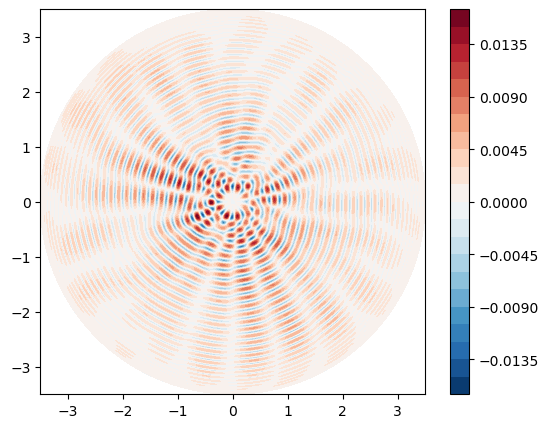

In [22]:
q1t = q1[20,:,:]
fig = plt.figure(figsize=(7, 5))
gs = fig.add_gridspec(1, 2, width_ratios=[1, 0.05], wspace=0.1)

# main (square) axes
ax = fig.add_subplot(gs[0, 0])
im = ax.contourf(x,y, q1t, levels=21, cmap='RdBu_r')
ax.set_aspect('equal')           # force square aspect
ax.set_adjustable('box')         # let the box resize

fig.colorbar(im)
plt.show()
# fig, ax = plt.subplots()
# im = ax.contourf(x, y, q1t)